From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load data

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(data['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
data.shape

(150, 6)

In [71]:
x = data.iloc[:,[1,2,3,4]].values

In [8]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data["Species_cat"] = lb_make.fit_transform(data["Species"])
data[["Species", "Species_cat"]][40:60]

,Species,Species_cat
40,Iris-setosa,0
41,Iris-setosa,0
42,Iris-setosa,0
43,Iris-setosa,0
44,Iris-setosa,0
45,Iris-setosa,0
46,Iris-setosa,0
47,Iris-setosa,0
48,Iris-setosa,0
49,Iris-setosa,0


In [10]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_cat
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [12]:
y = data.iloc[:,6]

In [64]:
# Finding the best value of cluster_count using elbow method
from sklearn.cluster import KMeans
cluster_count_test=10
wcss=[]
for i in range(1,cluster_count_test+1):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans=kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [66]:
#applying kmeans with optimal number of clusters gained by elbow method
cluster_count=3
kmeans=KMeans(n_clusters=cluster_count,random_state=0)
kmeans=kmeans.fit(x)

y_pred=kmeans.predict(x)#predicted labels
centroids=kmeans.cluster_centers_

In [67]:
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [68]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [56]:
wcss

[550.6434666666667,
 86.40394533571003,
 31.38775897435898,
 19.49940089968511,
 13.933308757908758,
 11.107174889156013,
 9.22580873015873,
 7.69668529657477,
 6.472894541406307,
 5.67856103236538]

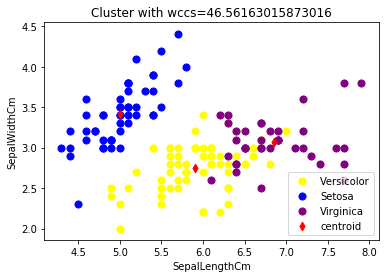

In [80]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=50,c='yellow',label='Versicolor')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=50,c='blue',label='Setosa')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=50,c='purple',label='Virginica')
plt.scatter(centroids[:,0],centroids[:,1],c='red',marker='d',label='centroid')

plt.title('Cluster with wccs='+str(wcss[4]))
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

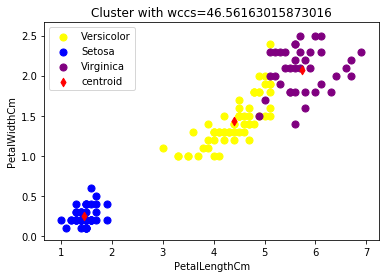

In [82]:
plt.scatter(x[y_pred==0,2],x[y_pred==0,3],s=50,c='yellow',label='Versicolor')
plt.scatter(x[y_pred==1,2],x[y_pred==1,3],s=50,c='blue',label='Setosa')
plt.scatter(x[y_pred==2,2],x[y_pred==2,3],s=50,c='purple',label='Virginica')
plt.scatter(centroids[:,2],centroids[:,3],c='red',marker='d',label='centroid')

plt.title('Cluster with wccs='+str(wcss[4]))
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()